### Necessary libraries

In [161]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

### Read data from the web

In [172]:
data = pd.read_html("https://www.nufusu.com/ilceleri/izmir-ilceleri-nufusu")
data = data[0]
# data.to_excel("C:/Users/ahmet/OneDrive/Masaüstü/Python Files/GeoPandas/izmir_nüfus.xlsx")
data.rename(columns={"İlçe":"İlçe (District)", "Toplam Nüfus":"Toplam Nüfus (Population)"}, inplace=True)
data

,Yıl,İlçe (District),Toplam Nüfus (Population),Erkek Nüfusu,Kadın Nüfusu,Erkek %,Kadın %
0,2022,Buca,522.404,260.026,262.378,"%49,77","%50,23"
1,2022,Karabağlar,479.338,235.831,243.507,"%49,20","%50,80"
2,2022,Bornova,454.470,223.915,230.555,"%49,27","%50,73"
3,2022,Karşıyaka,346.264,161.749,184.515,"%46,71","%53,29"
4,2022,Konak,332.277,162.212,170.065,"%48,82","%51,18"
5,2022,Bayraklı,298.519,148.489,150.030,"%49,74","%50,26"
6,2022,Çiğli,214.065,106.630,107.435,"%49,81","%50,19"
7,2022,Torbalı,207.840,104.744,103.096,"%50,40","%49,60"
8,2022,Menemen,200.904,102.544,98.360,"%51,04","%48,96"
9,2022,Gaziemir,137.754,68.981,68.773,"%50,08","%49,92"


### Read the saved xlsx

In [163]:
# izmir = pd.read_excel("C:/Users/ahmet/OneDrive/Masaüstü/Python Files/GeoPandas/izmir_nüfus.xlsx")
izmir = data.copy()
izmir = izmir[["İlçe (District)", "Toplam Nüfus (Population)"]]
izmir["Toplam Nüfus (Population)"] = izmir["Toplam Nüfus (Population)"]*1000
izmir

,İlçe (District),Toplam Nüfus (Population)
0,Buca,522404.0
1,Karabağlar,479338.0
2,Bornova,454470.0
3,Karşıyaka,346264.0
4,Konak,332277.0
5,Bayraklı,298519.0
6,Çiğli,214065.0
7,Torbalı,207840.0
8,Menemen,200904.0
9,Gaziemir,137754.0


### Geospatial data

In [164]:
path_to_data = "C:/Users/ahmet/OneDrive/Masaüstü/Python Files/GeoPandas/Shapefiles/Turkey/TUR_adm2.shp"
izmir_shp = gpd.read_file(path_to_data)
izmir_shp

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,235,TUR,Turkey,1,Çanakkale,1,Çan,District,District,NaN,NaN,"POLYGON ((27.25197 40.10726, 27.24156 40.09260..."
1,235,TUR,Turkey,1,Çanakkale,2,Ayvacık,District,District,NaN,NaN,"POLYGON ((26.36819 39.48042, 26.36764 39.48042..."
2,235,TUR,Turkey,1,Çanakkale,3,Bayramiç,District,District,NaN,NaN,"POLYGON ((26.42260 39.69836, 26.42402 39.70488..."
3,235,TUR,Turkey,1,Çanakkale,4,Biga,District,District,NaN,NaN,"POLYGON ((27.46825 40.19469, 27.44983 40.18708..."
4,235,TUR,Turkey,1,Çanakkale,5,Bozcaada,District,District,NaN,NaN,"MULTIPOLYGON (((26.06097 39.94069, 26.06097 39..."
...,...,...,...,...,...,...,...,...,...,...,...,...
923,235,TUR,Turkey,81,Zinguldak,924,Alaplı,District,District,NaN,NaN,"POLYGON ((31.40903 41.21302, 31.41191 41.21186..."
924,235,TUR,Turkey,81,Zinguldak,925,Devrek,District,District,NaN,NaN,"POLYGON ((32.09200 41.01837, 32.05308 41.01892..."
925,235,TUR,Turkey,81,Zinguldak,926,Ereğli,District,District,NaN,NaN,"POLYGON ((31.40903 41.21302, 31.40903 41.21347..."
926,235,TUR,Turkey,81,Zinguldak,927,Gökçebey,District,District,NaN,NaN,"POLYGON ((32.18047 41.18181, 32.16695 41.18971..."


### Filter the geospatial data

In [165]:
izmir_shp = izmir_shp.loc[izmir_shp["NAME_1"] == "Izmir"]
izmir_shp.reset_index(inplace=True)
izmir_shp = izmir_shp[["NAME_2","geometry"]]
izmir_shp.rename(columns = {"NAME_2": "İlçe (District)"}, inplace=True)
izmir_shp["İlçe (District)"] = izmir_shp["İlçe (District)"].str.strip()
izmir_shp

,İlçe (District),geometry
0,Ödemiş,"POLYGON ((28.03687 38.02203, 28.01520 38.01574..."
1,Çeşme,"MULTIPOLYGON (((26.45958 38.19921, 26.45958 38..."
2,Çiğli,"MULTIPOLYGON (((27.07706 38.46708, 27.07569 38..."
3,Aliağa,"MULTIPOLYGON (((27.16815 38.89171, 27.16232 38..."
4,Balçova,"POLYGON ((27.06375 38.34775, 27.06190 38.35103..."
5,Bayındır,"POLYGON ((27.76550 38.19228, 27.76142 38.17754..."
6,Bergama,"POLYGON ((27.01153 38.92486, 27.01097 38.92486..."
7,Beydağ,"POLYGON ((28.14233 38.02924, 28.12650 38.04707..."
8,Bornova,"POLYGON ((27.35425 38.57761, 27.34584 38.56934..."
9,Buca,"POLYGON ((27.23330 38.29547, 27.22962 38.30222..."


### Changing coordinates

In [166]:
izmir_shp.to_crs(epsg=32635, inplace=True)

In [167]:
izmir_shp

,İlçe (District),geometry
0,Ödemiş,"POLYGON ((591008.806 4208766.556, 589113.572 4..."
1,Çeşme,"MULTIPOLYGON (((452681.158 4228055.862, 452681..."
2,Çiğli,"MULTIPOLYGON (((506722.753 4257643.726, 506603..."
3,Aliağa,"MULTIPOLYGON (((514582.903 4304772.892, 514079..."
4,Balçova,"POLYGON ((505570.487 4244401.429, 505408.910 4..."
5,Bayındır,"POLYGON ((567033.056 4227426.097, 566689.894 4..."
6,Bergama,"POLYGON ((500999.286 4308438.545, 500951.339 4..."
7,Beydağ,"POLYGON ((600255.481 4209675.404, 598842.422 4..."
8,Bornova,"POLYGON ((530856.382 4269964.271, 530127.330 4..."
9,Buca,"POLYGON ((520400.776 4238624.306, 520077.186 4..."


### Area column

In [168]:
izmir_shp["Alan (Area)(km2)"] = izmir_shp.area/1000000
izmir_shp

,İlçe (District),geometry,Alan (Area)(km2)
0,Ödemiş,"POLYGON ((591008.806 4208766.556, 589113.572 4...",974.603822
1,Çeşme,"MULTIPOLYGON (((452681.158 4228055.862, 452681...",216.181886
2,Çiğli,"MULTIPOLYGON (((506722.753 4257643.726, 506603...",97.093765
3,Aliağa,"MULTIPOLYGON (((514582.903 4304772.892, 514079...",283.186401
4,Balçova,"POLYGON ((505570.487 4244401.429, 505408.910 4...",28.235115
5,Bayındır,"POLYGON ((567033.056 4227426.097, 566689.894 4...",644.707853
6,Bergama,"POLYGON ((500999.286 4308438.545, 500951.339 4...",1689.222674
7,Beydağ,"POLYGON ((600255.481 4209675.404, 598842.422 4...",217.086110
8,Bornova,"POLYGON ((530856.382 4269964.271, 530127.330 4...",273.738796
9,Buca,"POLYGON ((520400.776 4238624.306, 520077.186 4...",132.398310


### Merging

In [169]:
izmir_shp = izmir_shp.merge(izmir, on="İlçe (District)")
izmir_shp

,İlçe (District),geometry,Alan (Area)(km2),Toplam Nüfus (Population)
0,Ödemiş,"POLYGON ((591008.806 4208766.556, 589113.572 4...",974.603822,132740.0
1,Çeşme,"MULTIPOLYGON (((452681.158 4228055.862, 452681...",216.181886,48924.0
2,Çiğli,"MULTIPOLYGON (((506722.753 4257643.726, 506603...",97.093765,214065.0
3,Aliağa,"MULTIPOLYGON (((514582.903 4304772.892, 514079...",283.186401,104828.0
4,Balçova,"POLYGON ((505570.487 4244401.429, 505408.910 4...",28.235115,80721.0
5,Bayındır,"POLYGON ((567033.056 4227426.097, 566689.894 4...",644.707853,40073.0
6,Bergama,"POLYGON ((500999.286 4308438.545, 500951.339 4...",1689.222674,105754.0
7,Beydağ,"POLYGON ((600255.481 4209675.404, 598842.422 4...",217.086110,12030.0
8,Bornova,"POLYGON ((530856.382 4269964.271, 530127.330 4...",273.738796,454470.0
9,Buca,"POLYGON ((520400.776 4238624.306, 520077.186 4...",132.398310,522404.0


### Population density

In [171]:
izmir_shp["Nüf. Yoğ. (Pop. Density)"] = izmir_shp["Toplam Nüfus (Population)"]/izmir_shp["Alan (Area)(km2)"]
izmir_shp = izmir_shp[["İlçe (District)", "Toplam Nüfus (Population)", "Alan (Area)(km2)", "Nüf. Yoğ. (Pop. Density)", "geometry"]]
izmir_shp

,İlçe (District),Toplam Nüfus (Population),Alan (Area)(km2),Nüf. Yoğ. (Pop. Density),geometry
0,Ödemiş,132740.0,974.603822,136.198932,"POLYGON ((591008.806 4208766.556, 589113.572 4..."
1,Çeşme,48924.0,216.181886,226.309433,"MULTIPOLYGON (((452681.158 4228055.862, 452681..."
2,Çiğli,214065.0,97.093765,2204.724473,"MULTIPOLYGON (((506722.753 4257643.726, 506603..."
3,Aliağa,104828.0,283.186401,370.173143,"MULTIPOLYGON (((514582.903 4304772.892, 514079..."
4,Balçova,80721.0,28.235115,2858.886892,"POLYGON ((505570.487 4244401.429, 505408.910 4..."
5,Bayındır,40073.0,644.707853,62.156836,"POLYGON ((567033.056 4227426.097, 566689.894 4..."
6,Bergama,105754.0,1689.222674,62.605127,"POLYGON ((500999.286 4308438.545, 500951.339 4..."
7,Beydağ,12030.0,217.086110,55.415798,"POLYGON ((600255.481 4209675.404, 598842.422 4..."
8,Bornova,454470.0,273.738796,1660.232330,"POLYGON ((530856.382 4269964.271, 530127.330 4..."
9,Buca,522404.0,132.398310,3945.699923,"POLYGON ((520400.776 4238624.306, 520077.186 4..."


### Plotting

<AxesSubplot:>

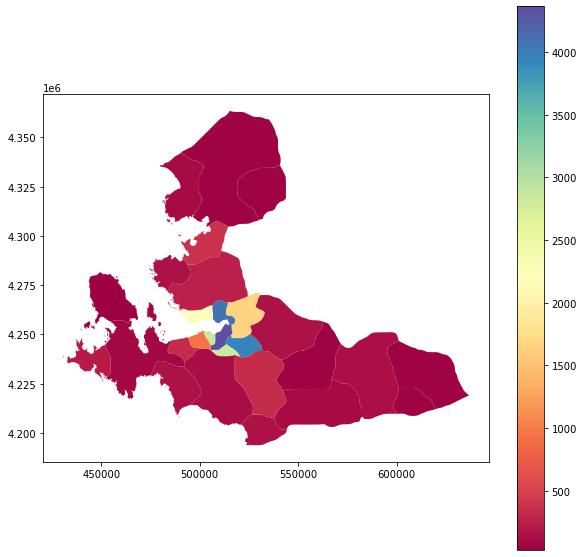

In [126]:
izmir_shp.plot(column="Pop. Density", cmap="Spectral", legend=True, figsize=(10,10))

Birkaç not:

1- Aldığım veriler yer yer tutarsız. İlk linkten aldığım veri 30 adet ilçe bulunduruyor iken - ki doğru sayı budur - DIV-GIS'ten aldığım .shp dosyaları 28 adet ilçe içeriyor: Karabağlar ve Bayraklı eksik. Bu ilçeleri ve nüfuslarını dataframe'e manuel de ekleyebilirim ancak haritalandırabilmek için geometry kolonu şart, ve o kolon .shp dosyasında eksik olunca elden bir şey gelmiyor.

Yine de, eksik ilçeleri bulmakta kullandığım kodu da altta veriyorum:

****
A couple of notes:

1- The data I acquired is inconsistent at times. While the data I got from the first link has 30 districts - which is the correct amount - the .shp files I acquired from DIVA-GIS have only 28: Karabaglar and Bayrakli districts are missing. I can add these districts and their populations to the data frame by hand, but the geometry column is a must for mapping. And there's nothing I can do if that column is missing in the .shp file.

Nonetheless, here's the code snippet I used to find the missing districts:

In [177]:
for index, row in data["İlçe (District)"].iteritems():
    if row in izmir_shp["İlçe (District)"].tolist():
        pass
    else:
        print("The district", row, "is NOT in the .shp data.")
        print(row, " ilçesi .shp verisetinde eksik.")

The district Karabağlar is NOT in the .shp data.
Karabağlar  ilçesi .shp verisetinde eksik.
The district Bayraklı is NOT in the .shp data.
Bayraklı  ilçesi .shp verisetinde eksik.


2- İlçelerin nüfus ve yüzölçümü bilgileri yer yer tutarsız. Bunun sebebi ya DIVA-GIS veriseti, ya da to_crs() fonksiyonunun içinde verdiğim EPSG kodu.

****

2- The population and area information of the districts are sometimes inconsistent. This is due to the DIVA-GIS dataset or the EPSG code I wrote inside the to_crs() function.

3- GeoPandas ile çalışmaya devam etmeyi planlıyorum, bu nedenle bu süreçte her türlü yardıma açığım.

****

3- I plan to keep working with GeoPandas, so I'm open to any sort of assistance in this process.